# Machine Translation

English-German Translation

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [0]:
import pandas as pd 
import string 
import pickle
from pickle import dump
from pickle import load
from string import digits
import re 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import array, argmax, random, take 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [0]:
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Input,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 
from keras import optimizers 

In [63]:
!  pip install version_information

In [64]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,re,sklearn, matplotlib,keras

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
re 2.2.1
sklearn 0.21.3
matplotlib 3.0.3
keras 2.2.5
Tue Sep 10 18:18:12 2019 UTC

# 2)- Reading Dataset

In [0]:
lines= pd.read_pickle('data_2015.pkl')

In [66]:
lines.shape

(2169, 2)

In [67]:
lines.head()

,eng,ger
0,unk and unk prime unk unk in unk,die premierminister unk und unk unk sich in unk
1,unk new prime minister unk unk is meeting his unk unk unk unk in unk to unk economic and security unk on his first major foreign unk since unk unk election,unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk
2,mr unk is on a unk unk to unk to unk economic unk with the third largest economy in the world,herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk
3,high on the unk are plans for unk unk unk,plane fur eine unk unk unk stehen ganz oben auf der unk
4,unk is also unk unk for a deal on unk unk between the two unk,berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk


As this is big data and I have a poor old computing machine. So, I ll use smaller sample. It got to be random to avoid sample biaseness

In [68]:
lines.sample(15)

,eng,ger
1797,recently there have been a lot of unk between both of the castle unk in wolfratshausen,unk gab es immer wieder unk zwischen den beiden wolfratshauser unk
1690,guangzhou one of the twin cities located some unk away is a connection that will be well looked after and unk by both unk for example with a school unk,die verbindung zu dem kilometer unk guangzhou gehort zu unk die von beiden seiten unk werden etwa mit einem unk
303,and unk unk also as he describes that too,auch da ist er unk ehrlich
64,unk unk and her unk unk have posted a video unk to their late mother who died of ovarian cancer in,unk unk und ihr unk unk haben eine unk fur ihre mutter online unk die an eierstockkrebs unk
1691,last year unk the year of unk relations,im vergangenen jahr wurde das unk der unk verbindung unk
280,by unk more than participants unk unk unk unk for having organized this tour through unk,uber teilnehmer unk sich mit ihrer unk bei unk unk unk fur die organisation dieser unk durch das unk
1312,unk unk unk unk president for higher unk said this unk seems unk out of unk with the lives of the majority of students,unk unk unk des unk fur unk sagte dieses unk scheint unk unk vom leben der unk der studenten
1675,it would be unk it again the local politician seemed unk,es wurde sich wieder unk zeigte sich der unk unk
1602,the unk who is now said as a child i knew i couldnt do the same things as others,die mutter von zwei kindern die heute jahre alt ist sagte als unk wusste ich dass ich nicht das unk tun konnte wie die anderen
660,he looked again,er sah noch einmal hin


In [0]:
#lines = lines[:5000]

# 3)- Quick Preprocessing

In [0]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ger=lines.ger.apply(lambda x: x.lower())

In [0]:
# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ger=lines.ger.apply(lambda x: re.sub("'", '', x))

In [0]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ger=lines.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [0]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ger=lines.ger.apply(lambda x: x.translate(remove_digits))

In [0]:
# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ger=lines.ger.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ger=lines.ger.apply(lambda x: re.sub(" +", " ", x))

**Do threshold here**

In [0]:
# Add start and end tokens to target sequences. I am not German so , I am doing so for my ease
lines.ger = lines.ger.apply(lambda x : 'START_ '+ x + ' _END')

In [76]:
lines.ger[:5]

0                                                                                                 START_ die premierminister unk und unk unk sich in unk _END
1    START_ unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk _END
2                                        START_ herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk _END
3                                                                                         START_ plane fur eine unk unk unk stehen ganz oben auf der unk _END
4                                                        START_ berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk _END
Name: ger, dtype: object

In [77]:
lines.sample(10)

,eng,ger
231,think of the unk,START_ an die unk denken _END
893,now they are unk this unk unk in ukraine,START_ und nun unk sie den unk dieser unk in der ukraine _END
1350,police relations with the black community is not the only issue unk to the unk of unk feminism,START_ das unk der polizei zur der schwarzen unk ist nicht das unk problem dass sich in den unk des unk unk _END
1571,following unk opposition from the cdu the unk of germany unk unk has put her foot down with unk to the unk of tolls,START_ unk unk unk hat nach unk unk aus ihrer cdu ein unk fur die unk einer unk unk _END
2035,photos unk her unk hands with putin were received in brussels with unk as was the fact that she unk the kremlin chief to an economic summit in unk in unk,START_ fotos die sie mit putin beim unk zeigten wurden in brussel mit unk aufgenommen ebenso da sie den unk fur unk zu einem unk unk unk _END
1468,after hours of hard work father unk unk the unk of the unk for the new unk room on may,START_ nach einer unk von stunden unk am mai unk unk fur die neuen unk den unk unk _END
1731,the organizers idea was right,START_ das unk der veranstalter unk _END
847,i wish i could call unk and just say it myself that years have unk but i still remember meeting her and her unk in london and how that unk damir and me,START_ ich wunschte ich konnte unk unk und ihr einfach selbst sagen dass jahre unk sind aber ich mich immer noch an das treffen mir ihr und ihrem mann in london erinnern und wie das damir und mir ...
419,in the unk areas of the town unk unk with the unk army have continued unk,START_ im unk kommt es immer wieder zu unk kampfen mit der unk armee _END
1175,after unk mesothelioma abbott was put in unk with andrew lawson who four years after his diagnosis had become a unk support and unk unk for fellow sufferers,START_ nachdem er mesotheliom unk hatte kam abbott in kontakt mit andrew lawson der vier jahre nach seiner diagnose ein unk und unk fur unk geworden war _END


### 3a)- Vocab Size

In [0]:
# Vocabulary of English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
# Vocabulary of German 
all_german_words=set()
for ger in lines.ger:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

In [79]:
# Max Length of source sequence
import numpy as np
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)
max_length_src

71

In [80]:
# Max Length of target sequence
lenght_list=[]
for l in lines.ger:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)
max_length_tar

73

In [81]:
lines['word_eng'] = lines['eng'].apply(lambda x: len(str(x).split(" ")))
lines[['eng','word_eng']].head()

,eng,word_eng
0,unk and unk prime unk unk in unk,8
1,unk new prime minister unk unk is meeting his unk unk unk unk in unk to unk economic and security unk on his first major foreign unk since unk unk election,31
2,mr unk is on a unk unk to unk to unk economic unk with the third largest economy in the world,21
3,high on the unk are plans for unk unk unk,10
4,unk is also unk unk for a deal on unk unk between the two unk,15


In [82]:
# adding +2 due to adding of START and END
lines['word_ger'] = lines['ger'].apply(lambda x: len(str(x).split(" ")))
lines[['ger','word_ger']].head()

,ger,word_ger
0,START_ die premierminister unk und unk unk sich in unk _END,11
1,START_ unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk _END,32
2,START_ herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk _END,24
3,START_ plane fur eine unk unk unk stehen ganz oben auf der unk _END,14
4,START_ berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk _END,17


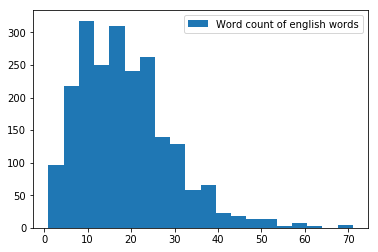

In [83]:
words_eng=lines['word_eng']
plt.hist(words_eng, bins=20, label="Word count of english words") 
plt.legend() 
plt.show()

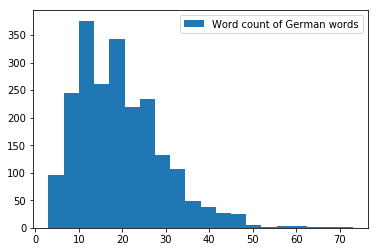

In [84]:
words_ger=lines['word_ger']
plt.hist(words_ger, bins=20, label="Word count of German words") 
plt.legend() 
plt.show()

### 3b)-Words' frequency

In [85]:
# let’s check the 10 most frequently occurring words in our English text data
freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[:10]
freq_eng

unk     9455
the     2643
to      1115
of      1078
in      1015
and      953
a        903
for      423
that     410
is       400
dtype: int64

In [86]:
freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[:12]
freq_ger

unk       11732
START_     2169
_END       2169
die        1256
der        1177
und         940
in          790
den         453
von         433
das         426
zu          406
fur         333
dtype: int64

As we have start and end so, I did check 12 so that we get idea of most fequent words

**How about least occuring words**

In [87]:
less_freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[-10:]
less_freq_eng

founded         5
spread          5
rapid           5
spent           5
nice            5
calculus        5
intelligence    5
remembers       5
goods           5
points          5
dtype: int64

In [88]:
less_freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[-10:]
less_freq_ger

deal                   5
stoff                  5
allem                  5
unternehmenssteuern    5
gewerkschaft           5
generationen           5
november               5
gleichen               5
geismar                5
kampfe                 5
dtype: int64

### 3a)- Defining input and target

In [89]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

(1211, 991)

In [90]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

992

In [0]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [0]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [93]:
print(reverse_input_char_index)

{1: 'a', 2: 'abandoned', 3: 'abbott', 4: 'able', 5: 'abortions', 6: 'about', 7: 'above', 8: 'access', 9: 'according', 10: 'account', 11: 'accused', 12: 'across', 13: 'act', 14: 'action', 15: 'actions', 16: 'activists', 17: 'actually', 18: 'addition', 19: 'adelaide', 20: 'admitting', 21: 'affected', 22: 'africa', 23: 'after', 24: 'again', 25: 'against', 26: 'age', 27: 'ago', 28: 'agreed', 29: 'agreement', 30: 'ahead', 31: 'ailinn', 32: 'air', 33: 'airport', 34: 'all', 35: 'allow', 36: 'almost', 37: 'alone', 38: 'along', 39: 'already', 40: 'also', 41: 'although', 42: 'always', 43: 'alyona', 44: 'am', 45: 'amazon', 46: 'america', 47: 'american', 48: 'americans', 49: 'among', 50: 'amount', 51: 'an', 52: 'and', 53: 'andrew', 54: 'anniversary', 55: 'announced', 56: 'announcement', 57: 'annual', 58: 'another', 59: 'answer', 60: 'any', 61: 'anyone', 62: 'apollo', 63: 'april', 64: 'are', 65: 'area', 66: 'areas', 67: 'arm', 68: 'army', 69: 'around', 70: 'as', 71: 'asbestos', 72: 'asked', 73: 'as

In [94]:
print(reverse_target_char_index)

{1: 'START_', 2: '_END', 3: 'ab', 4: 'abbott', 5: 'abend', 6: 'aber', 7: 'abtreibungen', 8: 'adelaide', 9: 'ailinn', 10: 'aljona', 11: 'all', 12: 'alle', 13: 'allein', 14: 'allem', 15: 'allen', 16: 'aller', 17: 'allerdings', 18: 'alles', 19: 'als', 20: 'also', 21: 'alt', 22: 'alten', 23: 'alter', 24: 'altere', 25: 'am', 26: 'amazon', 27: 'amerikanischen', 28: 'an', 29: 'andere', 30: 'anderem', 31: 'anderen', 32: 'anders', 33: 'andrew', 34: 'anfang', 35: 'angaben', 36: 'angeblich', 37: 'angeboten', 38: 'angekundigt', 39: 'angst', 40: 'anklage', 41: 'anstieg', 42: 'anteil', 43: 'apollo', 44: 'april', 45: 'arbeit', 46: 'arbeiten', 47: 'arbeiter', 48: 'arbeitete', 49: 'arbeitsplatz', 50: 'armee', 51: 'art', 52: 'arzt', 53: 'arzte', 54: 'arzten', 55: 'asbest', 56: 'asbestkontakt', 57: 'auch', 58: 'auer', 59: 'auerdem', 60: 'auf', 61: 'aufgabe', 62: 'aufgenommen', 63: 'aufgerufen', 64: 'aufgrund', 65: 'aufhoren', 66: 'augen', 67: 'august', 68: 'aus', 69: 'ausbildung', 70: 'ausgaben', 71: 'au

### 3b)-Train - Test Split

For validation

In [95]:
X, y = lines.eng, lines.ger #X being input, y being target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((1735,), (434,))

**Save the train and test dataframes for reproducing the results later, as they are shuffled**

In [0]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [0]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# 4)-Encoder - Decoder Model Architecture

In [0]:
latent_dim = 50

In [0]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#from IPython.display import Image
#Image(retina=True, filename='train.png')

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 15

In [104]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 50)     60550       input_5[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 50)     49600       input_6[0][0]                    
____________________________________________________________________________________________

In [105]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/15
13/13 [==============================] - 5s 393ms/step - loss: 6.5550 - acc: 0.2605 - val_loss: 5.6338 - val_acc: 0.3001
Epoch 2/15
13/13 [==============================] - 3s 269ms/step - loss: 5.1643 - acc: 0.2953 - val_loss: 4.7516 - val_acc: 0.3019
Epoch 3/15
13/13 [==============================] - 4s 275ms/step - loss: 4.6361 - acc: 0.2958 - val_loss: 4.5090 - val_acc: 0.3009
Epoch 4/15
13/13 [==============================] - 4s 272ms/step - loss: 4.5120 - acc: 0.2938 - val_loss: 4.4392 - val_acc: 0.3030
Epoch 5/15
13/13 [==============================] - 4s 275ms/step - loss: 4.4732 - acc: 0.2950 - val_loss: 4.4398 - val_acc: 0.3001
Epoch 6/15
13/13 [==============================] - 4s 272ms/step - loss: 4.4674 - acc: 0.2948 - val_loss: 4.4352 - val_acc: 0.3019
Epoch 7/15
13/13 [==============================] - 4s 273ms/step - loss: 4.4618 - acc: 0.2939 - val_loss: 4.4303 - val_acc: 0.3009
Epoch 8/15
13/13 [==============================] - 4s 272ms/step - loss: 4.

In [0]:
# save model
model.save_weights('translate.h5')

In [0]:
model.load_weights('translate.h5')

# Inference Setup

In [0]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

# Decode sample sequeces

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
  

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# Evaluation on Train Dataset

In [0]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [111]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: this his father had always done to unk the unk unk before it left his unk
Actual German Translation:  das hatte sein vater immer getan um den unk unk zu unk bevor er aus seinem unk kam 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [112]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: unk unk who is about to unk unk law school unk unk the unk number to price books since it unk you are unk for the right unk
Actual German Translation:  unk unk der unk die unk unk unk unk wird unk die unk fur die unk bei unk da man so sicher sein kann das richtige unk zu finden 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [113]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: this unk legislation will give workers the same legal options for union organizing discrimination as for other unk of discrimination unk unk forces in their unk
Actual German Translation:  dieses unk gesetz gibt unk die gleichen unk unk bei unk wegen der organisation von gewerkschaften wie bei anderen unk der unk und unk so unk unk unk 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


# Evaluation on Validation Dataset

In [0]:
val_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [115]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: mr stewart also claimed the service had a safety unk
Actual German Translation:  herr stewart gab auch an dass der service eine unk habe 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [116]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: then was then
Actual German Translation:  das war damals 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [117]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: carried away by the day kevern began to play at an unk unk and in a unk unk voice unk unk big feet
Actual German Translation:  in der unk des tages begann kevern ein unk unk zu spielen und in einer unk unk unk groe fue zu unk 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


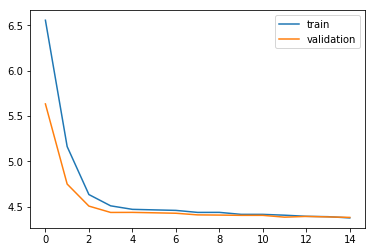

In [118]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['train','validation']) 
plt.show()

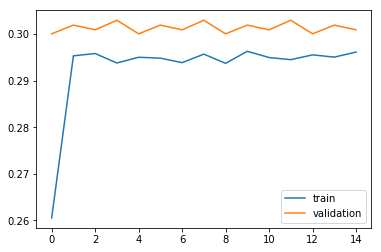

In [119]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.legend(['train','validation']) 
plt.show()